In [1]:
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.models as models
import mlgrad.cls.cls_pca as cls_pca
import mlgrad.regr as regr

import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)
Y = Y.astype("d")
d1 = 1; d2 = 2
X2 = X[(Y == d1) | (Y == d2)]
Y2 = Y[(Y == d1) | (Y == d2)]
Y2[Y2 == d1] = -1
Y2[Y2 == d2] = +1
N = len(Y2)
n = X2.shape[1]

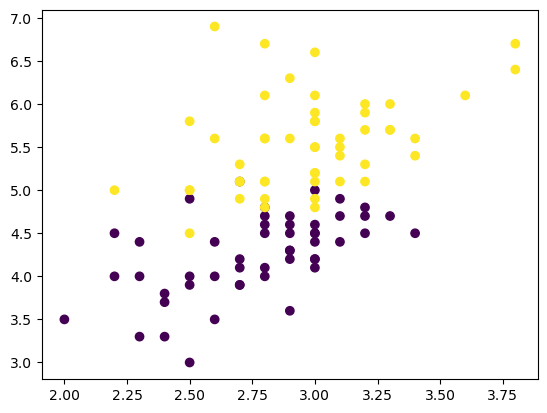

In [3]:
plt.scatter(X2[:,1], X2[:,2], c=Y2)
plt.show()

In [4]:
# def make_model(n):
#     mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), n)
#     return mod

hinge_loss = loss.MarginLoss(funcs.Hinge(1.0))
cc, As, Us, mods = cls_pca.cls_pca(X2, Y2, hinge_loss, n, h=0.01, n_iter=5000, )
# Us = np.atan(1*Us)

0 : 4999 0.97
1 : 4999 0.84
2 : 4999 0.82
3 : 4999 0.82


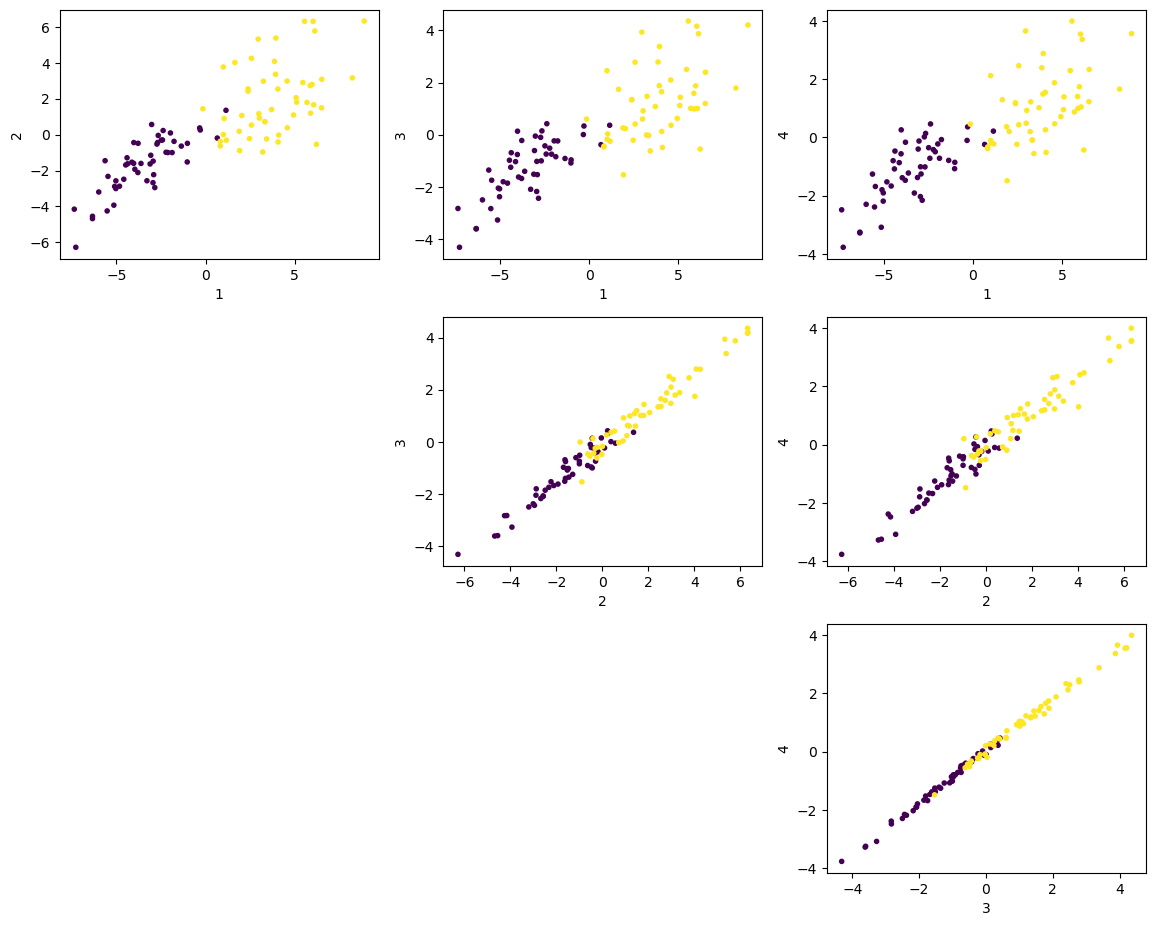

In [5]:
m = n
plt.figure(figsize=(15,12))
for i in range(m-1):
    for j in range(i+1,m):
        plt.subplot(m,m,m*i+j+1)
        plt.scatter(Us[i], Us[j], c=Y2, s=9)
        plt.xlabel(i+1)
        plt.ylabel(j+1)
plt.tight_layout()
plt.show()

In [12]:
body = models.FFNetworkModel()
linear_layer = models.LinearLayer(n, n)
linear_layer.allocate()
for i in range(n):
    linear_layer.matrix[i,:] = mods[i].param
body += linear_layer
scale_layer = models.ScaleLayer(funcs.Sigmoidal(5), n)
body += scale_layer

In [13]:
U = body.evaluate(X2)
print(U.shape)

(100, 4)


In [14]:
# plt.figure(figsize=(15,12))
# for i in range(n-1):
#     for j in range(i+1,n):
#         plt.subplot(n,n,n*i+j+1)
#         plt.scatter(U[:,i], U[:,j], c=Y2, s=9)
#         plt.xlabel(i+1)
#         plt.ylabel(j+1)
# plt.tight_layout()
# plt.show()

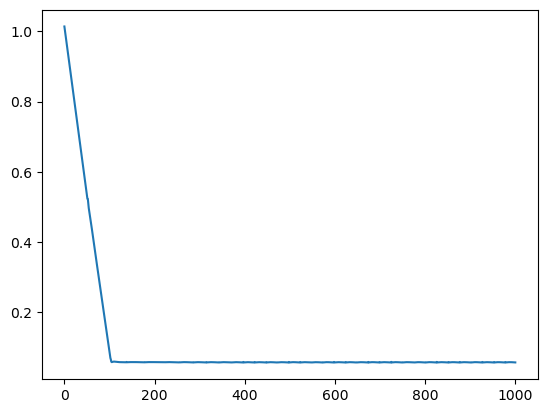

In [24]:
head = models.LinearModel(n, intercept=0)
alg2 = regr.regression(U, Y2, head, hinge_loss, h=0.01, tol=1.0e-8, n_iter=1000)

plt.plot(alg2.lvals)
plt.show()

In [25]:
accuracy_score(Y2, np.sign(head.evaluate(U)))

0.97

In [26]:
print(np.asarray(head.param))

[1.060 0.465 0.083 0.323]
